In [1]:
!pip3 install opencv-python 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Ex 1 Lena.png read and print dimensions

In [3]:
img1 = cv2.imread('lena.png',cv2.IMREAD_UNCHANGED)
img1.shape

(512, 512, 3)

### Ex 1 chair.png read and print dimensions

In [4]:
img2 = cv2.imread('chair.png', cv2.IMREAD_UNCHANGED)
img2.shape

(137, 137, 4)

### Ex 2 Verify channels in chair.png

In [5]:
len(img2.shape)

3

### Plot Mask of chair.png

In [6]:
# cv2.imshow("mask", img2[:,:,3])
# cv2.waitKey(0)

### Increase intensity of lena.png by 45 in grayscale

In [7]:
img3 = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
img3 = img3+45
# cv2.imshow("lena2",img3)
# cv2.waitKey(0)

### Corrected method for linear intensity increase

In [8]:
img4 = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE).astype('int')
img4 = np.clip((img4+45), 0, 255).astype('uint8')
# cv2.imshow("lena2",img4)
# cv2.waitKey(0)

### Task 1

### Gamma transformation for gamma1.jpg

In [ ]:
img5 = cv2.imread('gamma1.jpg', cv2.IMREAD_GRAYSCALE).astype('float')
img5=np.divide(img5, 255)
c=1
gamma=6
img5 =c*np.power(img5,gamma)
img5=np.multiply(img5, 255).astype('uint8')
# cv2.imshow("gamma1",img5)
# cv2.waitKey(0)


### Gamma transformation for gamma2.jpg

In [ ]:
img6 = cv2.imread('gamma2.jpg', cv2.IMREAD_GRAYSCALE).astype('float')
img6=np.divide(img6, 255)
c=1
gamma=0.6
img6 =c*np.power(img6,gamma)
img6=np.multiply(img6, 255).astype('uint8')
# cv2.imshow("gamma1",img6)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Frequency Histogram Of an Image

<BarContainer object of 256 artists>

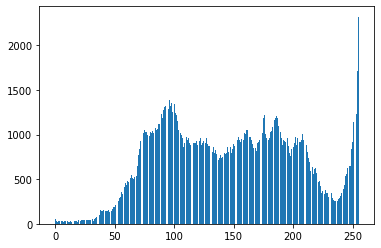

In [ ]:
img7 = cv2.imread('bell.jpg', cv2.IMREAD_GRAYSCALE)
xAxis = [i for i in range(0, 256)]
xAxis=np.asarray(xAxis)
freq = np.zeros(256)
for i in range(0, img7.shape[0]):
    for j in range(0, img7.shape[1]):
        freq[img7[i, j]]+=1
%matplotlib inline
plt.bar(xAxis, freq)

### Simple Thresholding

<BarContainer object of 256 artists>

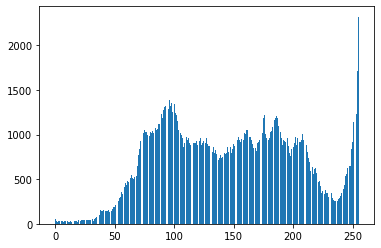

In [ ]:
img8 = cv2.imread('bell.jpg', cv2.IMREAD_GRAYSCALE)
xAxis = [i for i in range(0, 256)]
xAxis=np.asarray(xAxis)
freq = np.zeros(256)
for i in range(0, img8.shape[0]):
    for j in range(0, img8.shape[1]):
        freq[img8[i, j]]+=1
        if img8[i, j] > 135:
            img8[i, j]=255
        else:
            img8[i, j]=0
%matplotlib inline
plt.bar(xAxis, freq)
# cv2.imshow("bell threshold",img8)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


### Shortcomings of Simple Thresholding

<BarContainer object of 256 artists>

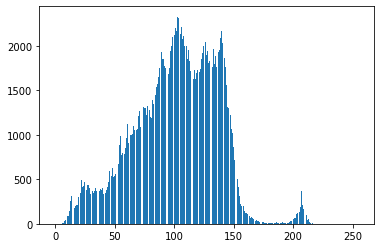

In [ ]:
img9 = cv2.imread('sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
xAxis = [i for i in range(0, 256)]
xAxis=np.asarray(xAxis)
freq = np.zeros(256)
for i in range(0, img9.shape[0]):
    for j in range(0, img9.shape[1]):
        freq[img9[i, j]]+=1
        if img9[i, j] > 55:
            img9[i, j]=255
        else:
            img9[i, j]=0
%matplotlib inline
plt.bar(xAxis, freq)
# cv2.imshow("sudoku threshold",img9)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


### Convolution Filtering

In [ ]:
img10 = cv2.imread('bell.jpg', cv2.IMREAD_GRAYSCALE)
img11 = cv2.imread('bell.jpg', cv2.IMREAD_GRAYSCALE)
mask = np.ones((3, 3))
mask = mask/9
for i in range(1, img10.shape[0]-1):
    for j in range(1, img10.shape[1]-1):
        temp=0
        for k in range(-1, 2):
            for m in range(-1, 2):
                temp+=img10[i+k, j+m]*mask[1+k, 1+m]
        img11[i, j] = temp
# cv2.imshow("bell convolution",img11)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


### Edge Detection:Sobel

In [ ]:
img12 = cv2.imread('window.jpeg', cv2.IMREAD_GRAYSCALE)
mask_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
mask_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
x_filtered = cv2.filter2D(img12, -1, mask_x)

#thresholding 
for i in range(0, x_filtered.shape[0]):
    for j in range(0, x_filtered.shape[1]):
        if x_filtered[i, j] > 150:
            x_filtered[i, j]=255
        else:
            x_filtered[i, j]=0    

#counting in y direction
countX=0
flagX=0
for i in range(0, x_filtered.shape[0]):
    if flagX==0 and x_filtered[i, 15]==255:
        flagX=1
        countX+=1
    elif flagX==1 and x_filtered[i, 15]==0:
        flagX=0
    else:
        continue
print(countX)

#thresholding
y_filtered = cv2.filter2D(img12, -1, mask_y)
for i in range(0, y_filtered.shape[0]):
    for j in range(0, y_filtered.shape[1]):
        if y_filtered[i, j] > 230:
            y_filtered[i, j]=255
        else:
            y_filtered[i, j]=0   

#counting in the x direction
countY=0
flagY=0
for i in range(0, y_filtered.shape[1]):
    if flagY==0 and y_filtered[15, i]==255:
        flagY=1
        countY+=1
    elif flagY==1 and y_filtered[15, i]==0:
        flagY=0
    else:
        continue
print(countY)
print((countX+1)*(countY+1))




13
9
140


### Task 2: Lotus.jpg RBG histogram

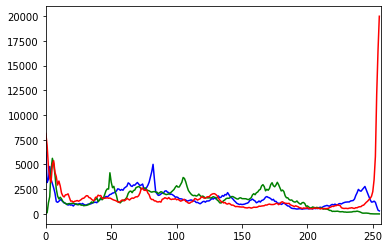

In [ ]:
def plotHistogramForRGB(img):
    img13 = cv2.imread(img)
    color = ('b','g','r')
    %matplotlib inline
    for i,col in enumerate(color):
        histr = cv2.calcHist([img13],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])

    plt.show()
plotHistogramForRGB('lotus.jpg')

### Threshold for fingerprint.jpg

<BarContainer object of 256 artists>

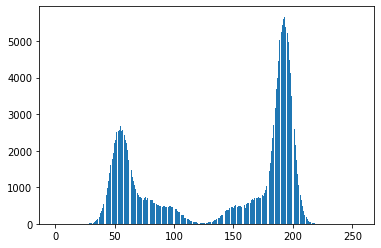

In [ ]:
img8 = cv2.imread('FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
xAxis = [i for i in range(0, 256)]
xAxis=np.asarray(xAxis)
freq = np.zeros(256)
for i in range(0, img8.shape[0]):
    for j in range(0, img8.shape[1]):
        freq[img8[i, j]]+=1
        if img8[i, j] > 135:
            img8[i, j]=255
        else:
            img8[i, j]=0
%matplotlib inline
plt.bar(xAxis, freq)
# cv2.imshow("fingerPrint",img8)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Threshold for text.jpg

In [ ]:
img8 = cv2.imread('text.jpg', cv2.IMREAD_GRAYSCALE)
xAxis = [i for i in range(0, 256)]
xAxis=np.asarray(xAxis)
freq = np.zeros(256)
for i in range(0, img8.shape[0]):
    for j in range(0, img8.shape[1]):
        freq[img8[i, j]]+=1
        if img8[i, j] > 75:
            img8[i, j]=255
        else:
            img8[i, j]=0
%matplotlib inline
plt.bar(xAxis, freq)
cv2.imshow("telugu text",img8)
cv2.waitKey(0)
cv2.destroyAllWindows()